In [ ]:
#!pip install wordcloud

In [4]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import nltk
#nltk.download() 
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\znaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Criação de um corpus lendo textos do disco
corpus = PlaintextCorpusReader('../dados', '.*', encoding = "ISO-8859-1")

In [40]:
type(corpus)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

In [25]:
# Leitura dos IDs de arquivo, percorrer os registros e mostrar o nome dos primeiros 10 arquivos
arquivos = corpus.fileids()

for i in range(0,10):
    print(arquivos[i])

1.txt
10.txt
100.txt
1000.txt
1001.txt
1002.txt
1003.txt
1004.txt
1005.txt
1006.txt


In [26]:
# Acesso ao texto do primeiro arquivo
texto = corpus.raw('1.txt')
texto

"@relation 'Reuters-21578 Corn ModApte Train-weka.filters.unsupervised.attribute.NumericToBinary-weka.filters.unsupervised.instance.RemoveFolds-S0-N5-F1'\r\n"

In [33]:
for i in range(10,30):
    print(corpus.raw(f'{i}.txt'))
    print("-"*40)

'COBANCO INC &lt;CBCO> YEAR NET Shr 34 cts vs 1.19 dlrs
    Net 807,000 vs 2,858,000
    Assets 510.2 mln vs 479.7 mln
    Deposits 472.3 mln vs 440.3 mln
    Loans 299.2 mln vs 327.2 mln
    Note: 4th qtr not available. Year includes 1985
extraordinary gain from tax carry forward of 132,000 dlrs, or
five cts per shr.
 Reuter
&#3;',0

----------------------------------------
'OHIO MATTRESS &lt;OMT> MAY HAVE LOWER 1ST QTR NET Ohio Mattress Co said its first
quarter, ending February 28, profits may be below the 2.4 mln
dlrs, or 15 cts a share, earned in the first quarter of fiscal
1986.
    The company said any decline would be due to expenses
related to the acquisitions in the middle of the current
quarter of seven licensees of Sealy Inc, as well as 82 pct of
the outstanding capital stock of Sealy.
    Because of these acquisitions, it said, first quarter sales
will be substantially higher than last years 67.1 mln dlrs.
    Noting that it typically reports first quarter results in
late 

In [35]:
# Acesso a todos as palavras de todos os arquivos do corpus
todo_texto = corpus.raw()
#todo_texto

In [41]:
corpus.words('1.txt')

['@', 'relation', "'", 'Reuters', '-', '21578', 'Corn', ...]

In [42]:
# Obtenção de todas as palavras do corpus e visualização da quantidade
palavras = corpus.words()
#acessando pelo indíce
palavras[170]

'dividend'

In [43]:
#quantidade
len(palavras)

244913

In [44]:
# Usando o NLTK, obtemos as stop word em inglês
stops1 = stopwords.words('english')
stops2 = stopwords.words('portuguese')

In [45]:
print(len(stops1))
print(len(stops2))

179
207


In [48]:
for i in range(0,10):
    print(stops1[i])
print("--"*40)
for i in range(0,10):
    print(stops2[i])

i
me
my
myself
we
our
ours
ourselves
you
you're
--------------------------------------------------------------------------------
a
à
ao
aos
aquela
aquelas
aquele
aqueles
aquilo
as


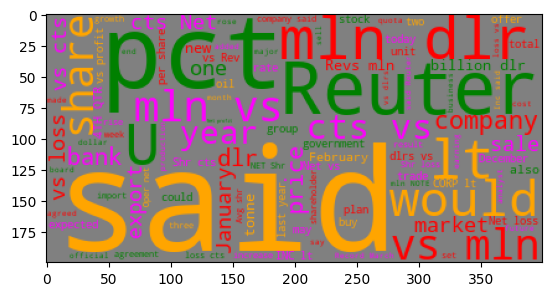

In [49]:
# Definição das cores que serão utilizadas na nuvem de palavras
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
# Criação da nuvem de palavras, com no máximo 100 palavras e utilizando as stop words
nuvem = WordCloud(background_color = 'gray',
                  colormap = mapa_cores,
                  stopwords = stops1,
                  max_words = 100)
# Criação e visualização da nuvem de palavras
nuvem.generate(todo_texto)
plt.imshow(nuvem)

In [51]:
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in palavras if p not in stops1]
len(palavras_semstop)

189446

In [52]:
# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]
len(palavras_sem_pontuacao)

156687

In [53]:
# Cálculo da frequência das palavras e visualização das mais comuns
frequencia = nltk.FreqDist(palavras_sem_pontuacao)
frequencia

FreqDist({'said': 3398, 'mln': 2721, '3': 2228, 'vs': 2194, '0': 1949, 'dlrs': 1945, '1': 1661, '000': 1640, '&#': 1466, ";',": 1432, ...})

In [54]:
#mais comuns
mais_comuns = frequencia.most_common(100)
mais_comuns

[('said', 3398),
 ('mln', 2721),
 ('3', 2228),
 ('vs', 2194),
 ('0', 1949),
 ('dlrs', 1945),
 ('1', 1661),
 ('000', 1640),
 ('&#', 1466),
 (";',", 1432),
 ('The', 1429),
 ('cts', 1374),
 ('lt', 1286),
 ('Reuter', 1214),
 ('pct', 1146),
 ('2', 1001),
 ('year', 878),
 ('U', 833),
 ('loss', 800),
 ('S', 794),
 ('billion', 707),
 ('5', 674),
 ('1986', 666),
 ('would', 638),
 ('4', 633),
 ('company', 518),
 ('share', 513),
 ('6', 505),
 ('profit', 498),
 ('Net', 486),
 ('7', 469),
 ('Shr', 456),
 ('8', 440),
 ('March', 439),
 ('net', 401),
 ('9', 393),
 ('Revs', 392),
 ('one', 390),
 ('Inc', 385),
 ('last', 380),
 ('tonnes', 361),
 ('market', 357),
 ('also', 355),
 ('shares', 351),
 ('per', 347),
 ('two', 340),
 ('stock', 339),
 ('oil', 328),
 ('prices', 325),
 ('10', 315),
 ('1985', 309),
 ('QTR', 300),
 ('1987', 298),
 ('31', 295),
 ('It', 294),
 ('trade', 290),
 ('quarter', 284),
 ('Corp', 277),
 ('12', 272),
 ('January', 272),
 ('15', 271),
 ('April', 244),
 ('Oper', 244),
 ('TO', 240),